In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.model_selection import cross_validate

In [2]:
url = "/Users/charles/Desktop/IndianLiverPatientDataset.csv"
cols = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG','Selector']
df = pd.read_csv(url,header=None, names=cols,index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Selector
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [3]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Selector
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
#how many patients in each variable

df[df.Selector==1].count() 

Age         415
Gender      415
TB          415
DB          415
Alkphos     415
Sgpt        415
Sgot        415
TP          415
ALB         415
AG          413
Selector    415
dtype: int64

In [5]:
df.count()

Age         582
Gender      582
TB          582
DB          582
Alkphos     582
Sgpt        582
Sgot        582
TP          582
ALB         582
AG          578
Selector    582
dtype: int64

In [6]:
#missing values percentage

total = df.isnull().sum().sort_values(ascending = False)
percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
AG,4,0.69
Selector,0,0.00
ALB,0,0.00
TP,0,0.00
Sgot,0,0.00
Sgpt,0,0.00
Alkphos,0,0.00
DB,0,0.00
TB,0,0.00
Gender,0,0.00


In [7]:
df[df.AG.isnull()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Selector
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [8]:
df.fillna(df.median(),inplace=True)
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Selector
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [9]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['Gender'].values)
y[:4]

array([1, 1, 1, 1])

In [10]:
#Mapping Female:1,Male:0

df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Selector
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [10]:
#Mapping Selector  positive:1,M negative:0

df['Selector'].replace([1,2],[1,0],inplace=True)
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Selector
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f35a518>,
      dtype=object)

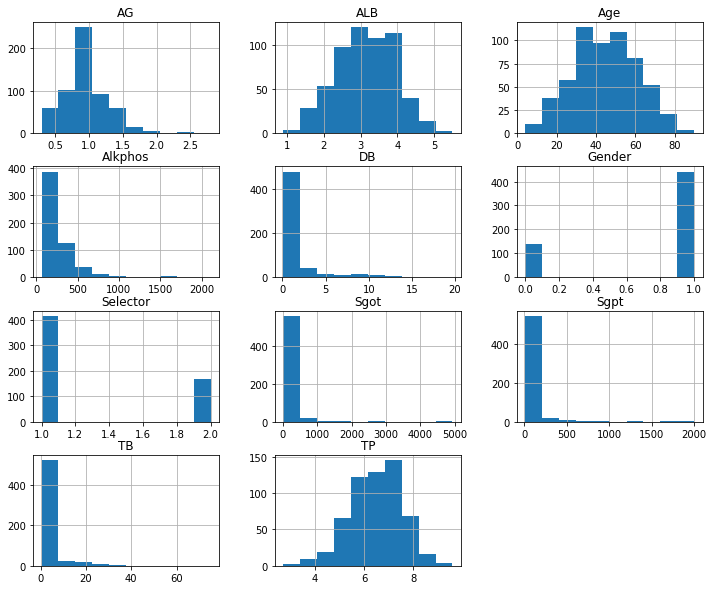

In [11]:
df.hist(figsize=(12,10))

Age            AxesSubplot(0.125,0.749828;0.168478x0.130172)
Gender      AxesSubplot(0.327174,0.749828;0.168478x0.130172)
TB          AxesSubplot(0.529348,0.749828;0.168478x0.130172)
DB          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Alkphos        AxesSubplot(0.125,0.593621;0.168478x0.130172)
Sgpt        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Sgot        AxesSubplot(0.529348,0.593621;0.168478x0.130172)
TP          AxesSubplot(0.731522,0.593621;0.168478x0.130172)
ALB            AxesSubplot(0.125,0.437414;0.168478x0.130172)
AG          AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Selector    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
dtype: object

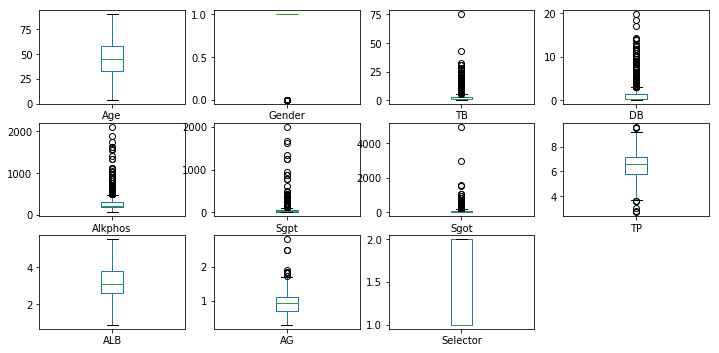

In [12]:
df.plot(kind= 'box', subplots=True, layout=(5,4),figsize=(12,10))

Text(0.5,1,'Correlation Matrix for Indian Liver Patient Dataset')

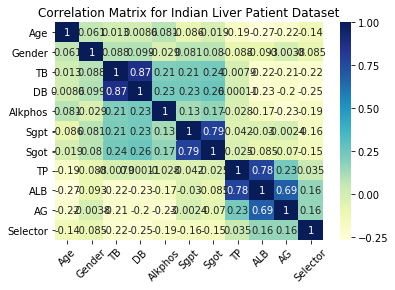

In [13]:
#Exploring relations
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.title('Correlation Matrix for Indian Liver Patient Dataset')

# Features

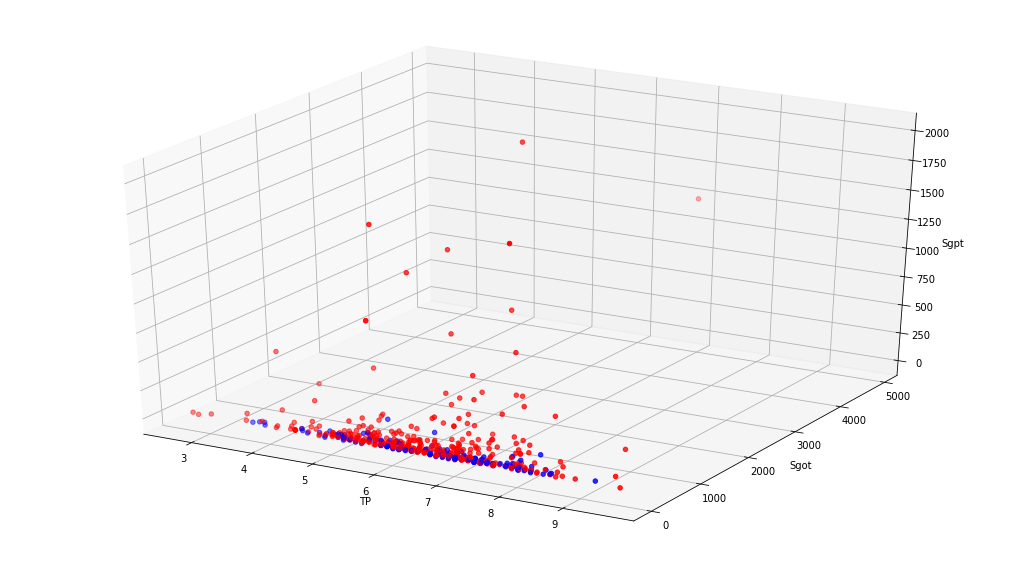

In [14]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

feature1 = df['TP'].values
feature2 = df['Sgot'].values 
feature3 = df['Sgpt'].values

df['Selector']=df['Selector'].astype('str')

c = df['Selector'].values
df['Selector']=df['Selector'].astype('int')
c[c=='0'] = 'b' #negative diagnosis disease
c[c=='1'] = 'r' #positive diagnosis disease

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('TP')
ax.set_ylabel('Sgot')
ax.set_zlabel('Sgpt')

plt.show()

In [15]:
X = df.loc[:,'Age':'AG'].values
y = df.loc[:,'Selector'].values

In [16]:
from sklearn.model_selection import train_test_split
splitRatio = 0.7

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(1-splitRatio),random_state=1)

# feature selection 
#Bringing features onto the same scale, Normalization via min-max scaling is commonly used technique that is useful when we need values in a bounded interval.

In [17]:
#Normalization 

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

X_train_norm
X_test_norm

array([[ 0.25581395,  1.        ,  0.19626168, ...,  0.        ,
        -0.02222222,  0.        ],
       [ 0.25581395,  1.        ,  0.02492212, ...,  0.73333333,
         0.66666667,  0.28      ],
       [ 0.40697674,  1.        ,  0.04361371, ...,  0.63333333,
         0.73333333,  0.432     ],
       ...,
       [ 0.47674419,  1.        ,  0.07165109, ...,  0.25      ,
         0.28888889,  0.2       ],
       [ 0.59302326,  1.        ,  0.01246106, ...,  0.38333333,
         0.37777778,  0.2       ],
       [ 0.47674419,  1.        ,  0.0529595 , ...,  0.73333333,
         0.66666667,  0.28      ]])

# Selecting meaningful features
Sequential feature selection algorithms

In [18]:
#需要注意

In [19]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

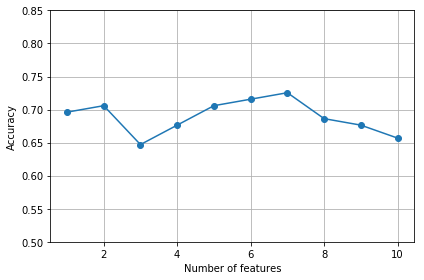

In [20]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=3)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_norm, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.50, 0.85])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
 (0, 1, 2, 3, 4, 6, 7, 8, 9),
 (1, 2, 3, 4, 6, 7, 8, 9),
 (1, 2, 3, 6, 7, 8, 9),
 (1, 2, 3, 6, 7, 9),
 (1, 2, 3, 7, 9),
 (1, 3, 7, 9),
 (1, 3, 9),
 (3, 9),
 (9,)]

In [22]:
#solution
k7=list(sbs.subsets_[3])
print (k7)

feature_labels = df.columns[0:10]
print (feature_labels[k7])

[1, 2, 3, 6, 7, 8, 9]
Index(['Gender', 'TB', 'DB', 'Sgot', 'TP', 'ALB', 'AG'], dtype='object')


# Dimensionality Reduction

Eigendecomposition of the covariance matrix

# Principal component analysis in scikit-learn

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_norm)
pca.explained_variance_ratio_

array([0.48576864, 0.18299808, 0.12453059, 0.08921481, 0.04297683,
       0.03774383, 0.02912749, 0.00394701, 0.00310516, 0.00058757])

# Visualize the explained variance and principal components¶

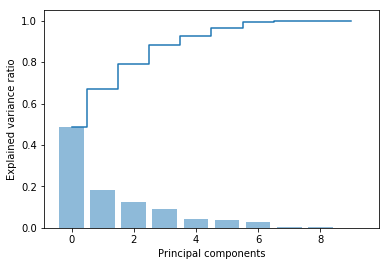

In [24]:
plt.bar(np.arange(10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(np.arange(10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

# GridSearchCV

In [25]:
list1 = [3,5,7,9]

#GridSearchCV
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in list1]
    },
    {
        'weights': ['distance'],
        'n_neighbors':[i for i in list1],
        'p':[i for i in range(1,10)]
    }
    
]

In [26]:
knn_clf = KNeighborsClassifier()

In [27]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid,cv=5)

In [28]:
%%time
grid_search.fit(X_train_norm,y_train)

CPU times: user 3.3 s, sys: 21.6 ms, total: 3.33 s
Wall time: 3.35 s


/Users/charles/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [3, 5, 7, 9]}, {'weights': ['distance'], 'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=1,
           weights='distance')

In [30]:
grid_search.best_score_

0.7076167076167076

In [31]:
grid_search.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

# Pipeline

In [32]:
#PCA And GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipe_knn = Pipeline([('mms', MinMaxScaler()),
            ('pca', PCA()),
            ('clf', KNeighborsClassifier(n_neighbors= 9, p= 1, weights= 'distance'))])

pipe_knn.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))
y_pred = pipe_knn.predict(X_test)

scores = cross_val_score(pipe_knn, X_test, y_test, cv=5)
scores.mean()

Test Accuracy: 0.657


0.6698225957049486

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 11,  37],
       [ 23, 104]])

In [48]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,11,37,48
1,23,104,127
All,34,141,175


In [49]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.23      0.27        48
           1       0.74      0.82      0.78       127

   micro avg       0.66      0.66      0.66       175
   macro avg       0.53      0.52      0.52       175
weighted avg       0.62      0.66      0.64       175



In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.5240321522309711

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

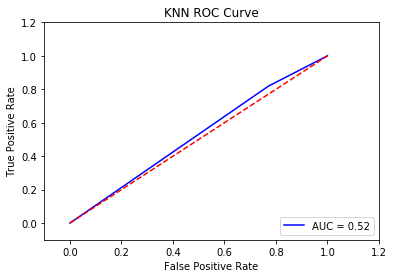

In [54]:
knn_false_positive_rate, knn_true_positive_rate, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_false_positive_rate, knn_true_positive_rate)

plt.title('KNN ROC Curve')
plt.plot(knn_false_positive_rate, knn_true_positive_rate, 'b',
label='AUC = %0.2f'% knn_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Decision tree

In [55]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)


In [56]:
# Use a random 80-20 split of data for training and testing resp.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
print ("number of instances for training: ", len(y_train))
print ("number of instances for test: ", len(y_test))

number of instances for training:  407
number of instances for test:  175


In [58]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [59]:
import graphviz 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
dot_data=StringIO()

feature_names=df.columns[0:10]
dot_data = export_graphviz(clf_dt, out_file = None, feature_names=feature_names, class_names=['negative', 'positive'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)

# GridSearchCV

In [60]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=42)

In [61]:
from sklearn.metrics import f1_score, make_scorer

In [63]:
# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)


/Users/charles/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [64]:
# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

The training F1 Score is 0.858877086494689
The testing F1 Score is 0.826388888888889


In [70]:
from sklearn.metrics import accuracy_score

dt_predict_test = best_clf.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, dt_predict_test)))

Accuracy: 0.7143


In [71]:

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(confusion_matrix(y_test,best_test_predictions, labels=[0, 1])))


Confusion Matrix
[[  6  42]
 [  8 119]]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,best_test_predictions))

              precision    recall  f1-score   support

           0       0.43      0.12      0.19        48
           1       0.74      0.94      0.83       127

   micro avg       0.71      0.71      0.71       175
   macro avg       0.58      0.53      0.51       175
weighted avg       0.65      0.71      0.65       175



In [73]:
roc_auc_score(y_test,best_test_predictions)

0.5310039370078741

In [74]:
dot_data=StringIO()

feature_names=df.columns[0:10]
dot_data = export_graphviz(best_clf, out_file = None, feature_names=feature_names, class_names=['negative', 'positive'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)


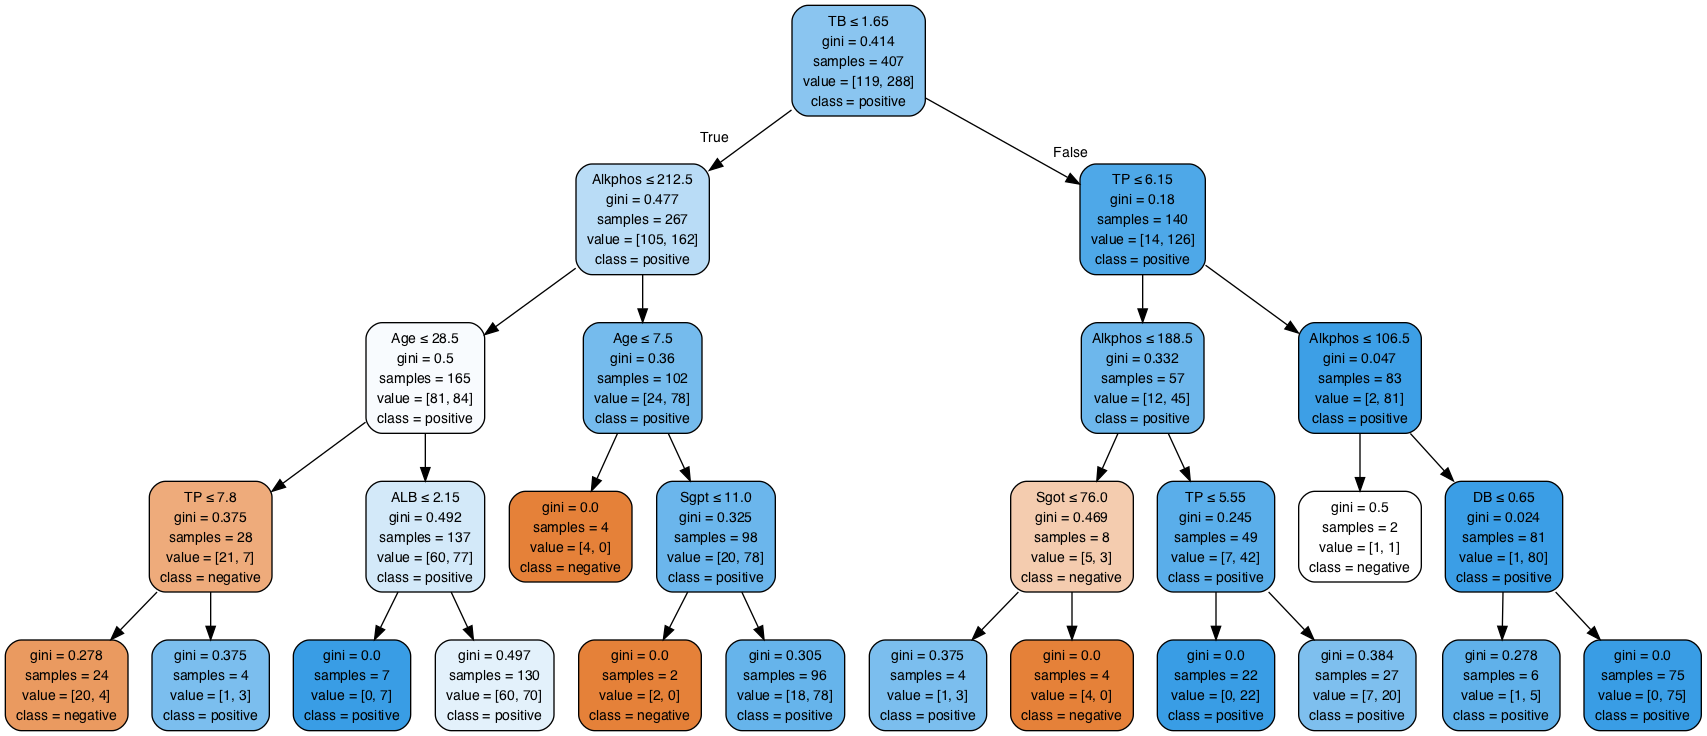

In [75]:
Image(graph.create_png())

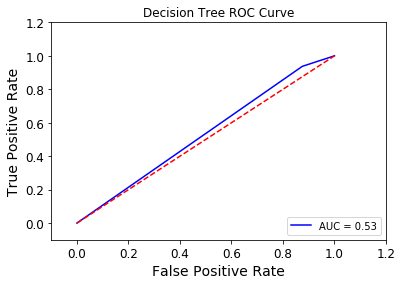

In [76]:
dt_false_positive_rate, dt_true_positive_rate, thresholds = roc_curve(y_test, best_test_predictions)
dt_roc_auc = auc(dt_false_positive_rate, dt_true_positive_rate)

plt.title('Decision Tree ROC Curve')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, 'b',
label='AUC = %0.2f'% dt_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Balance dataset

# SMOTE

In [35]:
from collections import Counter

print(Counter(y))


Counter({1: 415, 0: 167})


In [81]:
!pip install imblearn

You are using pip version 19.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [36]:
# 使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
# 定义SMOTE模型，random_state相当于随机数种子的作用

smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_sample(X, y)

In [37]:
print(Counter(y_smo))

Counter({1: 415, 0: 415})


In [38]:
from sklearn.model_selection import train_test_split
splitRatio = 0.7

X_train_smo,X_test_smo,y_train_smo,y_test_smo = train_test_split(X_smo,y_smo,test_size=(1-splitRatio),random_state=1)


In [39]:
X_train_norm_smo = mms.fit_transform(X_train_smo)
X_test_norm_smo = mms.transform(X_test_smo)

X_train_norm_smo
X_test_norm_smo

array([[0.63584433, 1.        , 0.00490442, ..., 0.77731557, 0.74603016,
        0.32      ],
       [0.53488372, 1.        , 0.00268097, ..., 0.30434783, 0.36956522,
        0.32      ],
       [0.10221573, 1.        , 0.00277455, ..., 0.65487211, 0.58898017,
        0.28      ],
       ...,
       [0.47674419, 0.        , 0.00402145, ..., 0.26086957, 0.2826087 ,
        0.24      ],
       [0.47674419, 0.        , 0.0080429 , ..., 0.85507246, 0.73913043,
        0.28      ],
       [0.65116279, 1.        , 0.00536193, ..., 0.52173913, 0.45652174,
        0.24      ]])

# KNN

In [43]:
list1 = [3,5,7,9]

#GridSearchCV
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in list1]
    },
    {
        'weights': ['distance'],
        'n_neighbors':[i for i in list1],
        'p':[i for i in range(1,10)]
    }
    
]

In [44]:
knn_clf = KNeighborsClassifier()

In [45]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid,cv=5)

In [46]:
%%time
grid_search.fit(X_train_norm_smo,y_train_smo)

CPU times: user 5.54 s, sys: 34.3 ms, total: 5.57 s
Wall time: 5.66 s


/Users/charles/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [3, 5, 7, 9]}, {'weights': ['distance'], 'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='distance')

In [48]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [49]:
#PCA And GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipe_knn = Pipeline([('mms', MinMaxScaler()),
            ('pca', PCA()),
            ('clf', KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance'))])

pipe_knn.fit(X_train_smo, y_train_smo)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test_smo, y_test_smo))
y_pred = pipe_knn.predict(X_test_smo)

Test Accuracy: 0.708


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_smo,y_pred)

array([[102,  26],
       [ 47,  75]])

In [51]:
#test F1
from sklearn.metrics import classification_report
print(classification_report(y_test_smo,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       128
           1       0.74      0.61      0.67       122

   micro avg       0.71      0.71      0.71       250
   macro avg       0.71      0.71      0.70       250
weighted avg       0.71      0.71      0.71       250



In [95]:
roc_auc_score(y_test_smo,y_pred)

0.7058145491803278

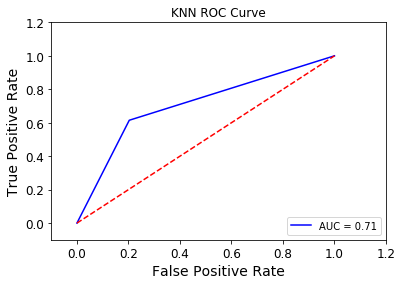

In [96]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smo, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('KNN ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# without GridCV

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipe_knn = Pipeline([('mms', MinMaxScaler()),
            ('pca', PCA()),
            ('clf', KNeighborsClassifier(n_neighbors= 7, p= 5, weights= 'distance'))])

pipe_knn.fit(X_train_smo, y_train_smo)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test_smo, y_test_smo))
y_pred = pipe_knn.predict(X_test_smo)

Test Accuracy: 0.676


In [98]:
confusion_matrix(y_test_smo,y_pred)

array([[101,  27],
       [ 54,  68]])

In [99]:
#test F1
from sklearn.metrics import classification_report
print(classification_report(y_test_smo,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       128
           1       0.72      0.56      0.63       122

   micro avg       0.68      0.68      0.68       250
   macro avg       0.68      0.67      0.67       250
weighted avg       0.68      0.68      0.67       250



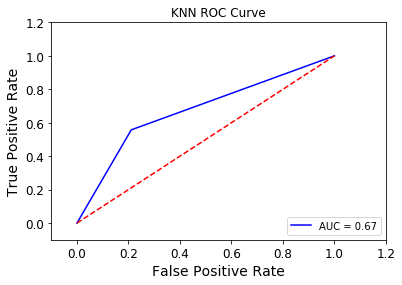

In [100]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smo, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('KNN ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree

In [101]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=100)

In [102]:
from sklearn.metrics import f1_score, make_scorer

# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train_smo, y_train_smo)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train_smo, y_train_smo)


/Users/charles/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [103]:
# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train_smo)
best_test_predictions = best_clf.predict(X_test_smo)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train_smo))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test_smo))

The training F1 Score is 0.9154411764705883
The testing F1 Score is 0.669603524229075


In [104]:
# Testing Accuracy

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test_smo, best_test_predictions)))
print()

Accuracy: 0.7000



In [105]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test_smo,best_test_predictions, labels=[0, 1])))


Confusion Matrix
[[99 29]
 [46 76]]


In [106]:
#Testing F1

from sklearn.metrics import classification_report
print(classification_report(y_test_smo,best_test_predictions))

              precision    recall  f1-score   support

           0       0.68      0.77      0.73       128
           1       0.72      0.62      0.67       122

   micro avg       0.70      0.70      0.70       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.70      0.70      0.70       250



In [107]:
roc_auc_score(y_test_smo,best_test_predictions)

0.6981941598360656

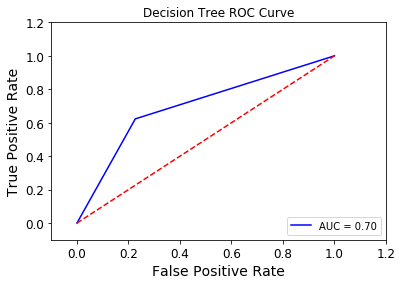

In [108]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smo, best_test_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Decision Tree ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [109]:
dot_data=StringIO()

feature_names=df.columns[0:10]
dot_data = export_graphviz(best_clf, out_file = None, feature_names=feature_names, class_names=['negative', 'positive'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
Image(graph.create_png())

# Without GridCV

In [ ]:
from sklearn.metrics import f1_score, make_scorer

# Get the estimator.
rand_clf = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=2, min_samples_leaf=2)



# Fit the new model.
rand_clf =rand_clf.fit(X_train_smo, y_train_smo)

rand_y_pred = rand_clf.predict(X_test_smo)

In [ ]:
rand_clf.get_params

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_smo, rand_y_pred))

In [ ]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test_smo,rand_y_pred, labels=[0, 1])))

In [ ]:
print(classification_report(y_test_smo,rand_y_pred))

In [ ]:
roc_auc_score(y_test_smo,rand_y_pred)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smo, rand_y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Decision Tree ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

X = X_train_smo
y = y_train_smo

depth = range(4, 9)
split = [2, 3, 4]
leaf_min = range(1, 5)
weighting = [{0: 1, 1: 1}, {0: 4, 1: 6},
             {0: 9, 1: 11}, {0: 4, 1: 5}]

grid = {'max_depth': depth,
        'min_samples_split': split,
        'min_samples_leaf': leaf_min,
        'class_weight' : weighting}

clf_rf = RandomForestClassifier(random_state=6042018,
                             n_estimators=20,
                             criterion='entropy',
                             max_features=4)

gridsearch = GridSearchCV(clf_rf, grid, cv=10)
gridsearch.fit(X, y)
gridsearch.best_params_
print(gridsearch.best_score_)
print(gridsearch.best_params_)


0.7965517241379311
{'class_weight': {0: 4, 1: 6}, 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}


/Users/charles/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
